# 워드 클라우드
워드 클라우드(태그 클라우드)란 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각화하는 기법이다.

예로 많이 언급될수록 __단어를 크게 표현해__ 한눈에 들어올 수 있게 하는 기법 등이 있으며 주로 빅데이터(big data)를 분석할 때 데이터의 특징을 도출하기 위해 활용한다.

WordCloud는 ```wordcloud``` 패키지와 형태소 분석 패키지(```konlpy-Twitter```), 단어 카운팅 팩키지를 쓴다.(```Counter```)

In [29]:
!pip install wordcloud

In [30]:
!pip install konlpy

In [31]:
from konlpy.tag import Twitter 
from collections import Counter

### 클라우드로 만들 텍스트 준비
보통은 파일을 readline으로 불러와 사용한다.

In [32]:
text = '''지금 알고 있는 걸 그때도 알았더라면
내 가슴이 말하는 것에 더 자주 귀를 기울였으리라.
더 즐겁게 살고, 덜 고민했으리라.
금방 학교를 졸업하고 머지않아 직업을 가져야 한다는 걸 때달았으리라.
아니, 그런 것들은 잊어 버렸으리라.
다른 사람들이 나에 대해 말하는 것에는
신경쓰지 않았으리라.
그 대신 내가 가진 생명력과 단단한 피부를 더 가치있게 여겼으리라.

더 많이 놀고, 덜 초조해 했으리라.
진정한 아름다움은 자신의 인생을 사랑하는 데 있음을 기억했으리라.
부모가 날 얼마나 사랑하는가를 알고
또한 그들이 내게 최선을 다하고 있음을 믿었으리라.

사랑에 더 열중하고
그 결말에 대해선 덜 걱정했으리라.
설령 그것이 실패로 끝난다 해도
더 좋은 어떤 것이 기다리고 있음을 믿었으리라.

아, 나는 어린아이처럼 행동하는 걸 두려워하지 않았으리라.
더 많은 용기를 가졌으리라.
모든 사람에게서 좋은 면을 발견하고
그것들을 그들과 함께 나눴으리라.

지금 알고 있는 걸 그때도 알았더라면
나는 분명코 춤추는 법을 배웠으리라.
내 육체를 있는 그대로 좋아했으리라.
내가 만난 사람을 신뢰하고
나 역시 누군가에게 신뢰할 만한 사람이 되었으리라.

입맞춤을 즐겼으리라.
정말로 자주 입을 맞췄으리라.
분명코 더 감사하고,
저 많이 행복해 했으리라.
지금 알고 있는 걸 그때도 알았더라면.
'''

### 형태소 나누기

```morphs```에 형태소를 분석한 text 결과물을 저장한다.

In [33]:
twitter = Twitter() 
morphs = [] 

morphs.append(twitter.pos(text)) 
    
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('지금', 'Noun'), ('알', 'Noun'), ('고', 'Josa'), ('있는', 'Adjective'), ('걸', 'Noun'), ('그때', 'Noun'), ('도', 'Josa'), ('알았더라면', 'Verb'), ('\n', 'Foreign'), ('내', 'Noun'), ('가슴', 'Noun'), ('이', 'Josa'), ('말', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('에', 'Josa'), ('더', 'Noun'), ('자주', 'Noun'), ('귀', 'Noun'), ('를', 'Josa'), ('기울였으리라', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('더', 'Noun'), ('즐겁게', 'Adjective'), ('살', 'Noun'), ('고', 'Josa'), (',', 'Punctuation'), ('덜', 'Noun'), ('고민', 'Noun'), ('했으리라', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('금방', 'Noun'), ('학교', 'Noun'), ('를', 'Josa'), ('졸업', 'Noun'), ('하고', 'Josa'), ('머', 'Noun'), ('지', 'Josa'), ('않아', 'Verb'), ('직업', 'Noun'), ('을', 'Josa'), ('가져야', 'Verb'), ('한다는', 'Modifier'), ('걸', 'Noun'), ('때', 'Noun'), ('달았으리라', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('아니', 'Adjective'), (',', 'Punctuation'), ('그런', 'Adjective'), ('것', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('잊어', 'Verb'), ('버렸으리라', 'Verb'), ('.', 'Pu

조사, 부사, 명사 등의 단어와 형태로 나누어 지는데 경우에 따라 워드 클라우드에 넣고 싶은 형태만 고른다.

#### 명사, 형용사, 부사만 골라내는 코드
```
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word):
            noun_adj_adv_list.append(word)
            
print(noun_adj_adv_list)

```

### 글자를 빈도수대로 정렬

글자를 카운트 해주는 패키지인 ```Counter```로 단어들을 빈도수대로 정렬후 딕셔너리 형태로 출력한다.

In [34]:
count = Counter(noun_adj_adv_list)

words = dict(count.most_common())
words

{'가슴': 1,
 '가치': 1,
 '걱정': 1,
 '걸': 5,
 '고민': 1,
 '귀': 1,
 '그': 4,
 '그대로': 1,
 '그때': 3,
 '금방': 1,
 '기억': 1,
 '날': 1,
 '누군가': 1,
 '다': 1,
 '다른': 1,
 '대신': 1,
 '대해': 2,
 '더': 8,
 '덜': 3,
 '데': 1,
 '때': 1,
 '또한': 1,
 '만': 1,
 '만난': 1,
 '머': 1,
 '면': 1,
 '모든': 1,
 '발견': 1,
 '법': 1,
 '부모': 1,
 '분명': 2,
 '사람': 4,
 '사랑': 3,
 '살': 1,
 '생명력': 1,
 '선': 1,
 '설령': 1,
 '신경': 1,
 '신뢰': 2,
 '실패': 1,
 '알': 4,
 '역시': 1,
 '열중': 1,
 '용기': 1,
 '움': 1,
 '육체': 1,
 '음': 3,
 '인생': 1,
 '입': 1,
 '입맞춤': 1,
 '자신': 1,
 '자주': 2,
 '저': 1,
 '졸업': 1,
 '지금': 3,
 '직업': 1,
 '최선': 1,
 '코': 2,
 '피부': 1,
 '학교': 1,
 '해도': 1,
 '행동': 1}

### 워드 클라우드 제작

디스플레이 설정하기

In [68]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

matplotlib.rc('axes', unicode_minus=False)

In [36]:
!apt -qq -y install fonts-nanum > /dev/null

시스템에 설치된 폰트 확인

In [37]:
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/lib

워드 클라우드 출력하기

### WordCloud 옵션 정리
* font_path : 한글의 경우 깨지지 않게 폰트 경로 지정
* background_color : 바탕 색 지정
* stopwords : 불용어 지정(무시 글자)
* width : 가로 길이 지정
* height : 세로 길이 지정
* max_font_size : 최대 크기 글자 지정

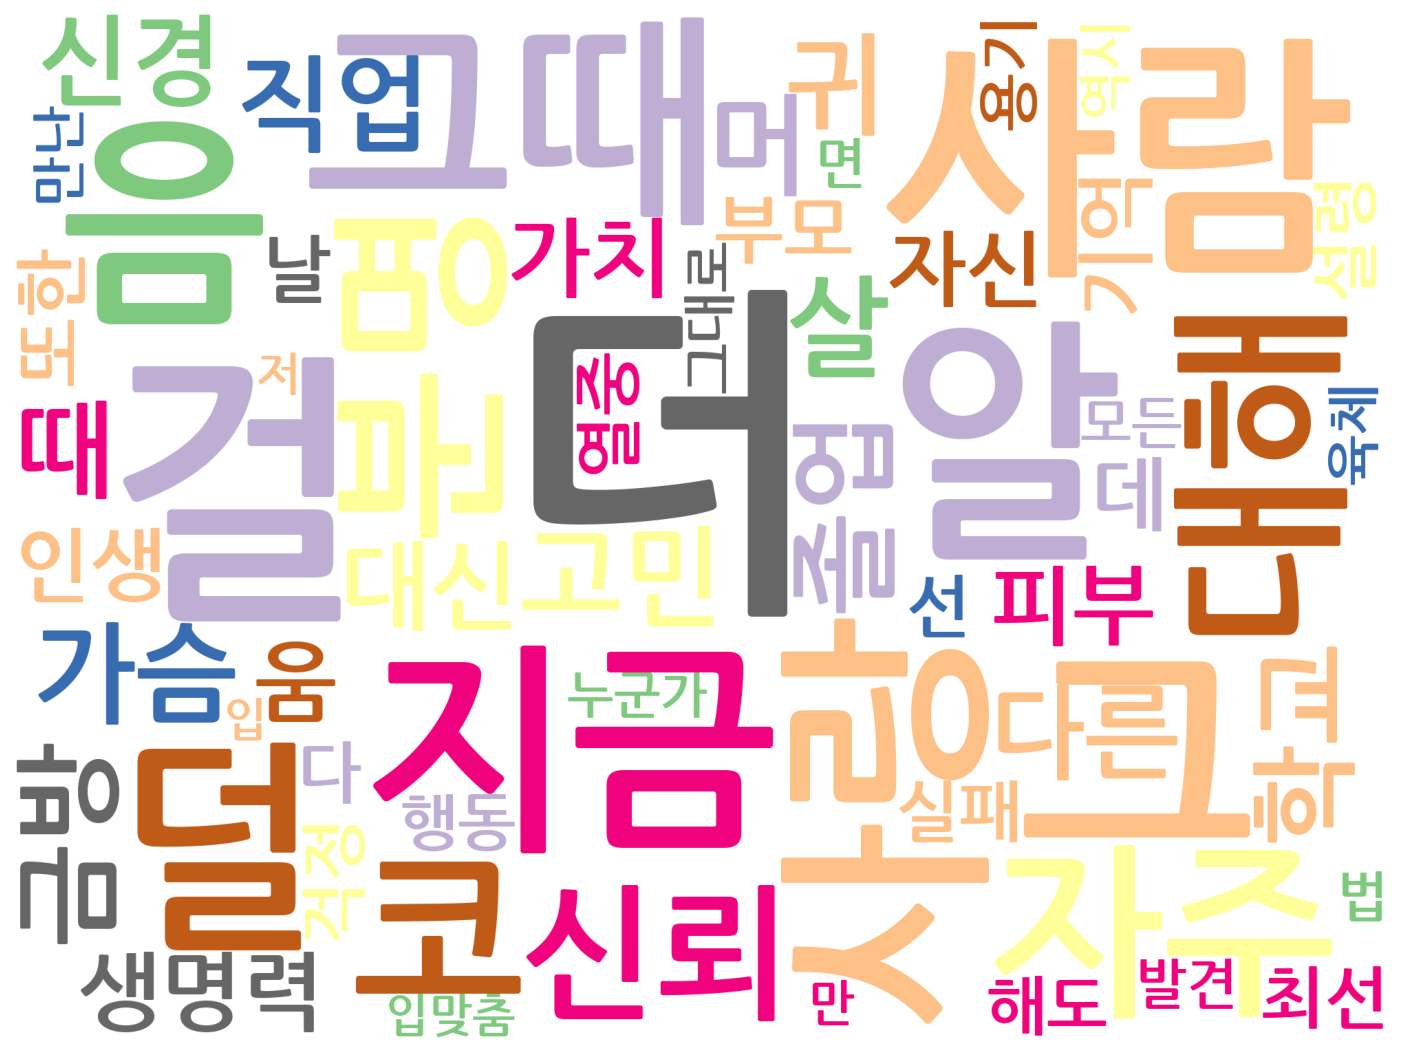

In [38]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', background_color='white',colormap = "Accent_r", width=2000, height=1500, max_font_size=500).generate_from_frequencies(words) 

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## MASK
마스크 기능으로 원하는 모양의 워드클라우드를 생성 할 수 있다.

__단, 이때는 경계선이 뚜렷한 png 파일 이미지가 필요하다.__

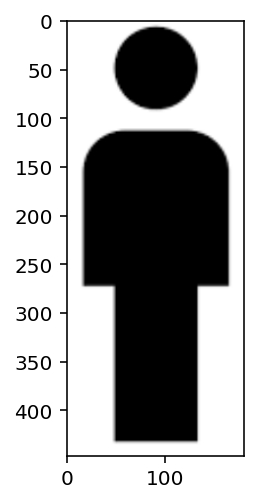

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

icon = Image.open('캡처.PNG')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

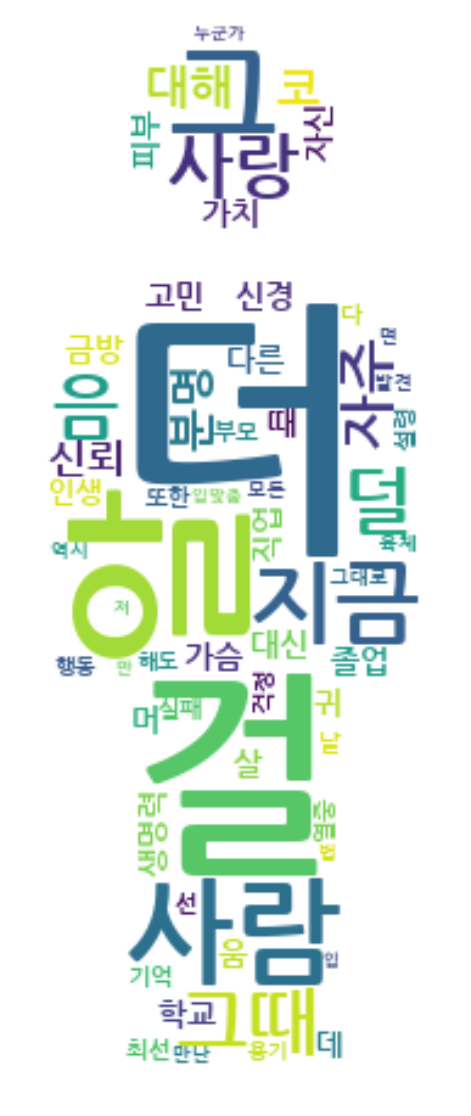

In [43]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정   

cloud = wc.generate_from_frequencies(words)                            #사전형태의 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

## WordCloud에 원하는 색 입히기


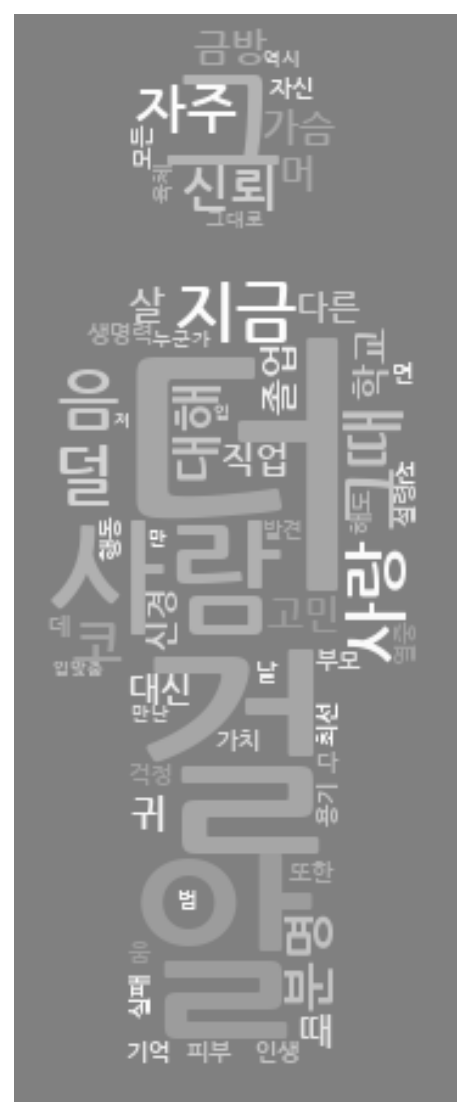

In [65]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', #폰트
               background_color='gray',                               #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정             
cloud = wc.generate_from_frequencies(words)                            #사전형태의 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기


############## 워드클라우드 색 지정
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(60,100))   ## 색상코드/숫자를 조정
                                                            ## hsl 색상코드 참고

plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")

### 워드클라우드에 사진과 같은 색 입히기

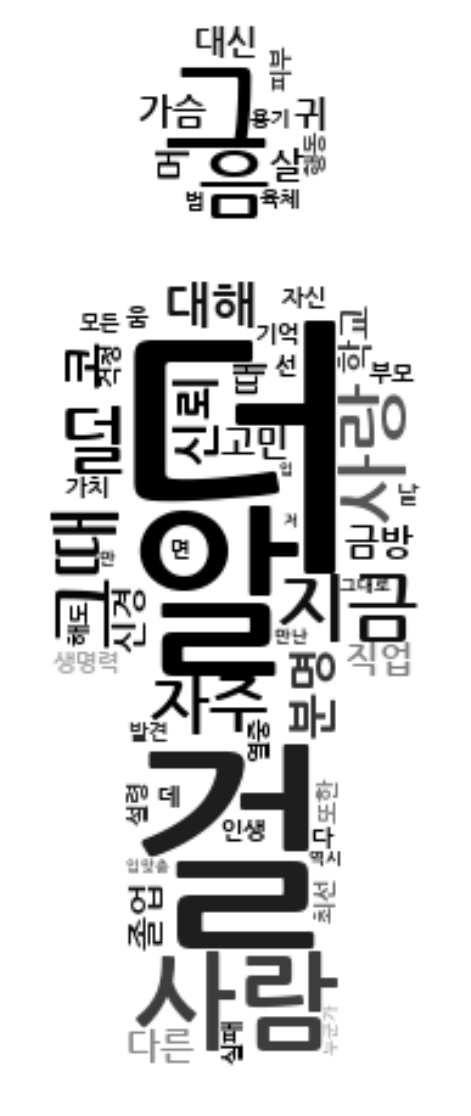

In [69]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',              #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정 

cloud = wc.generate_from_frequencies(words)                            #사전형태의 데이터


plt.figure(figsize=(10,10))                                          #액자사이즈설정
plt.axis('off')                                                      #테두리 선 없애기

##### create coloring from image #####                               #마스크의 색 입히기
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")